**Part A**

In [1]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet

import statsmodels.api as sm
from scipy.stats import zscore

%matplotlib inline


In [2]:
# read the data
a = pd.read_csv("Amazon.csv").drop(['Sr.No'], axis=1)
a


,Youtube,Facebook,Instagram,Expected profit
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


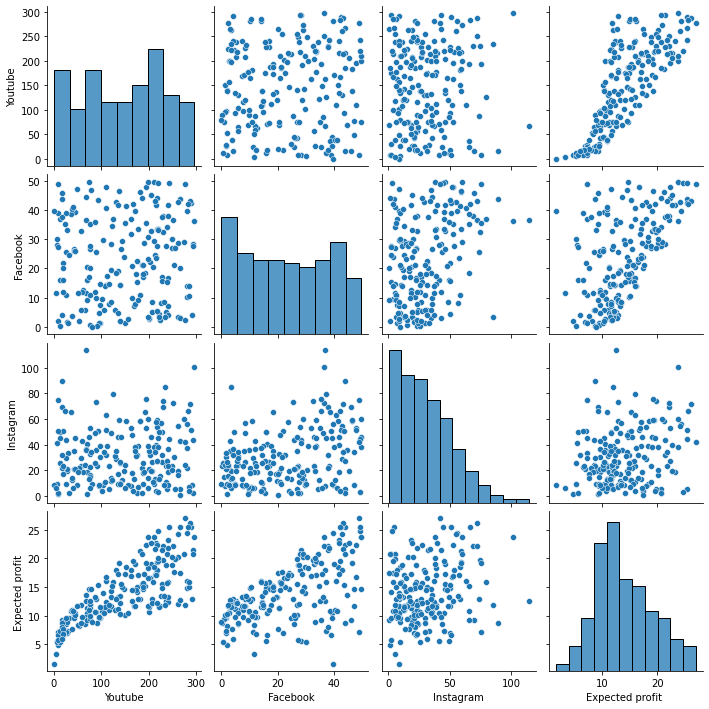

In [3]:
# Task 1: which social media to focus for a maximized profit

# quick view on correlations
sns.pairplot(a)


Observations: Youtube and Facebook have stronger correlations to Expected profit compared to Instagram.

In [4]:
# print and check correlations
print(a.corr())


                   Youtube  Facebook  Instagram  Expected profit 
Youtube           1.000000  0.054809   0.056648          0.782224
Facebook          0.054809  1.000000   0.354104          0.576223
Instagram         0.056648  0.354104   1.000000          0.228299
Expected profit   0.782224  0.576223   0.228299          1.000000


Observations:
Among independent variables, higher correlation (0.354104) was observed between Instagram and Facebook.
Instagram, the social media with lowest contribution to the expected profit has been excluded from the analysis to prevent multicollinearity.
    
We built several multiple linear regression models with Youtube and Facebook as independent variables.

In [5]:
# assign X
amazon_data = a[["Youtube", "Facebook"]].values

# create constant for SM OLS package
amazon_data_w_constant = sm.add_constant(amazon_data)

# assign y
amazon_profit = a[["Expected profit "]].values

# name X features
amazon_data_names = ["constant", "Youtube", "Facebook"]

### model 1: Statsmodel OLS

In [6]:
# split and fit the model
X, y = amazon_data_w_constant, amazon_profit
train_X, test_X, train_y, test_y = train_test_split(X , y, train_size = 0.8)

OLSMod = sm.OLS(train_y, train_X).fit()
print(OLSMod.summary(xname=amazon_data_names))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     645.8
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.76e-76
Time:                        12:13:52   Log-Likelihood:                -316.86
No. Observations:                 160   AIC:                             639.7
Df Residuals:                     157   BIC:                             648.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.8677      0.344      8.324      0.0

In [7]:
# print model evaluations for predictions

predictions = OLSMod.predict(test_X)

R2 = "{:.2%}".format(r2_score(test_y, predictions))
print("Prediction R2:", R2)


Prediction R2: 92.50%


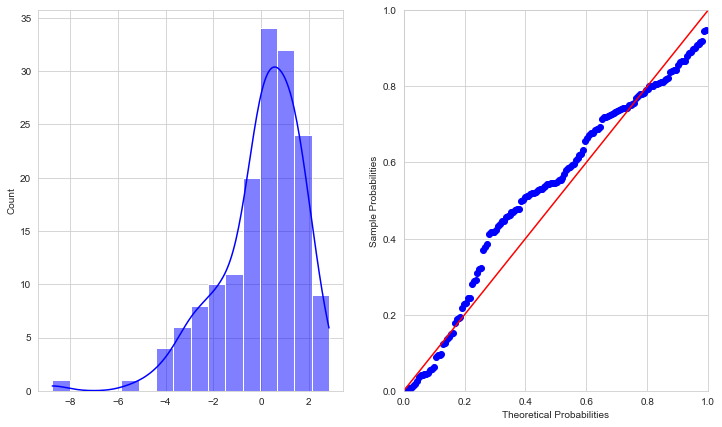

In [8]:
# render Residual Analysis

sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(OLSMod.resid, fit = True).ppplot(line='45', ax=ax[1]);
histplot = sns.histplot(OLSMod.resid,kde=True, color ='blue',ax=ax[0])


In [9]:
# Find Z-Score for Outlier Analysis
a['z_score_price'] = zscore(a["Expected profit "])

# Outlier would lie in plus or minus 3 SD.
ao = a[(a.z_score_price > 3.0) | (a.z_score_price < -3.0) ]

print(ao)


Empty DataFrame
Columns: [Youtube, Facebook, Instagram, Expected profit , z_score_price]
Index: []


Observations: No outliers in Data

### Model 2: Sklearn OLS

In [10]:
# split and fit the model
X, y = amazon_data, amazon_profit
train_X, test_X, train_y, test_y = train_test_split(X , y, train_size = 0.8)

LinReg = LinearRegression(normalize=True, fit_intercept=True)
LinReg.fit(train_X, train_y)
print("Model Score ", LinReg.score(train_X, train_y), "\ncoefficients: ", LinReg.coef_, "\nintercept: ", LinReg.intercept_)


Model Score  0.8863058225813465 
coefficients:  [[0.04611905 0.18028747]] 
intercept:  [3.0404117]


In [11]:
# print evaluations for predictions
predictions = LinReg.predict(test_X)

R2 = "{:.2%}".format(r2_score(test_y, predictions))

print("Prediction R2:", R2)


Prediction R2: 93.68%


### Model 3: ElasticNet

In [12]:
# split and fit the model
X, y = amazon_data, amazon_profit
train_X, test_X, train_y, test_y = train_test_split(X , y, train_size = 0.8)

regr = ElasticNet(random_state=0)

ElasticNet(random_state=0)

train_X, test_X, train_y, test_y = train_test_split(X , y, train_size = 0.8)

regr.fit(train_X, train_y)

print("Model Score ", regr.score(train_X, train_y), "\ncoefficients: ", regr.coef_, "\nintercept: ", regr.intercept_)


Model Score  0.9082107075888421 
coefficients:  [0.04379479 0.18638873] 
intercept:  [3.32061018]


In [13]:
# print evaluations for predictions
predictions = regr.predict(test_X)

R2 = "{:.2%}".format(r2_score(test_y, predictions))

print("Prediction R2:", R2)


Prediction R2: 86.21%


Conclusion: Instagram not only has high correlations with Facebook which can cause multicollinearity but also negligible correlations to the profit compared to other two variables. After removing Instagram, we obtained much reliable prediction models. All the three models showed high prediction scores up to 92.84%, which can differ by random splitting. Therefore, these models can provide insights to promote better marketing strategies using YouTube and Facebook.

**Part B**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [15]:
# read the data
data_b0=pd.read_csv('REMAX.csv')
data_b0.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
# explore the data
data_b0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
data_b0.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [18]:
# Convert 'Yes', 'No' values to 1 and 0.
data_b0['mainroad']=data_b0['mainroad'].map({'yes':1,'no':0})
data_b0['guestroom']=data_b0['guestroom'].map({'yes':1,'no':0})
data_b0['basement']=data_b0['basement'].map({'yes':1,'no':0})
data_b0['hotwaterheating']=data_b0['hotwaterheating'].map({'yes':1,'no':0})
data_b0['airconditioning']=data_b0['airconditioning'].map({'yes':1,'no':0})
data_b0['prefarea']=data_b0['prefarea'].map({'yes':1,'no':0})

In [19]:
data_b = pd.get_dummies(data_b0, columns=['furnishingstatus'])
data_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [20]:
# Assign columns as dependent variable and independent variables
## Independent Variable
x_b = data_b.drop('price',axis=1)
x_b_constant =  sm.add_constant(x_b)
## Dependent Variable
y_b = data_b['price']

In [21]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train_x_b, test_x_b, train_y_b, test_y_b = train_test_split( x_b_constant,y_b,train_size = 0.8,random_state = 100 )

In [22]:
# Model fit
remax_lm=sm.OLS(train_y_b,train_x_b.astype(float)).fit()

In [23]:
# Check the estimated parameter results
print(remax_lm.params)

const                             -1.522293e+05
area                               2.434617e+02
bedrooms                           9.072275e+04
bathrooms                          1.137441e+06
stories                            4.058954e+05
mainroad                           5.751244e+05
guestroom                          3.848975e+05
basement                           2.777378e+05
hotwaterheating                    8.478554e+05
airconditioning                    8.450776e+05
parking                            2.418730e+05
prefarea                           6.044695e+05
furnishingstatus_furnished         1.256488e+05
furnishingstatus_semi-furnished    2.366982e+04
furnishingstatus_unfurnished      -3.015480e+05
dtype: float64


In [24]:
# Explore stastistical summary
print(remax_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     68.41
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           3.51e-95
Time:                        12:13:54   Log-Likelihood:                -6666.8
No. Observations:                 436   AIC:                         1.336e+04
Df Residuals:                     422   BIC:                         1.342e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<Figure size 576x432 with 0 Axes>

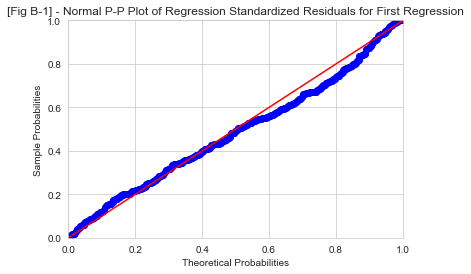

In [25]:
# Conduct a residual analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

remax_resid = remax_lm.resid
probplot = sm.ProbPlot( remax_resid, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "[Fig B-1] - Normal P-P Plot of Regression Standardized Residuals for First Regression" )
plt.show()

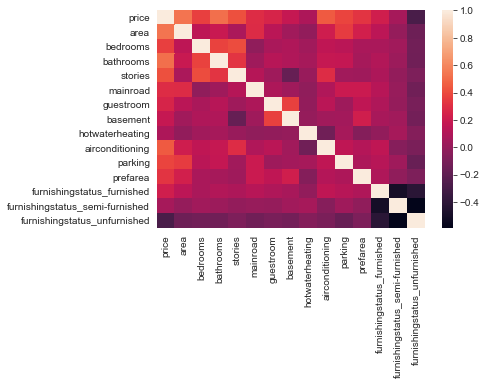

In [26]:
# print correlation matrix heatmap
corr = data_b.corr()
_ = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

In [27]:
# Detect multicollinearity with VIF and model with best fit
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( x_b ):
    x_b_matrix = x_b.to_numpy()
    vif = [ variance_inflation_factor( x_b_matrix, i ) for i in range( x_b_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = x_b.columns
    vif_factors['vif'] = vif
    return vif_factors

In [28]:
vif_factors = get_vif_factors(x_b).sort_values('vif', ascending=False)
vif_factors

,column,vif
12,furnishingstatus_semi-furnished,12.404306
13,furnishingstatus_unfurnished,8.826219
11,furnishingstatus_furnished,8.575840
3,stories,1.478055
1,bedrooms,1.369477
0,area,1.325250
6,basement,1.323050
2,bathrooms,1.286621
5,guestroom,1.212838
9,parking,1.212837


In [29]:
# Remove variables with high VIF
rmv = ['furnishingstatus_furnished','furnishingstatus_semi-furnished','furnishingstatus_unfurnished']
x_b2 = list( set(x_b) - set(rmv) )
get_vif_factors(x_b[x_b2])

,column,vif
0,parking,1.944662
1,prefarea,1.485975
2,airconditioning,1.740480
3,basement,2.012668
4,hotwaterheating,1.088037
5,guestroom,1.466132
6,mainroad,6.767779
7,bedrooms,15.186992
8,area,8.237351
9,bathrooms,9.397157


In [30]:
# Build new model after removing variables with high VIFs
train_x_b = train_x_b[x_b2]
remax_lm2 = sm.OLS(train_y_b, train_x_b).fit()
print(remax_lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              848.3
Date:                Wed, 29 Sep 2021   Prob (F-statistic):                   3.15e-281
Time:                        12:13:55   Log-Likelihood:                         -6673.3
No. Observations:                 436   AIC:                                  1.337e+04
Df Residuals:                     425   BIC:                                  1.341e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

<Figure size 576x432 with 0 Axes>

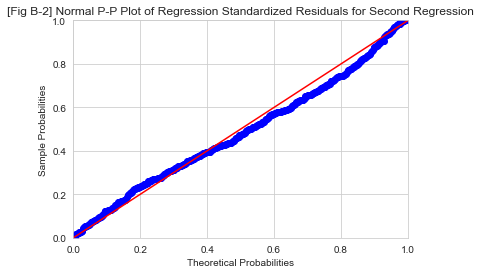

In [31]:
# Re-do the residual analysis and compare with the first one
remax_resid2 = remax_lm2.resid
probplot = sm.ProbPlot( remax_resid2, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "[Fig B-2] Normal P-P Plot of Regression Standardized Residuals for Second Regression" )
plt.show()

According to our analysis, the factors that have explanatory power to the price are: area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, and prefarea. The first regression shows that furnishing status is comparatively insignificant in pricing, and its  the VIF analysis indicates that the different furnishing status features (furnished, semi-furnished, not furnished) have high multicollinearity, which means that these features are highly correlated and reduces the explanatory power of the model. Removing the furnishing status gives a model with an improved goodness of fit with a 95.6% r-squared. Therefore, the price should be predicted without the furnishing status factor.

**Part C**

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd 

## Setting Pandas print option to print decimal values upto 4 places
np.set_printoptions(precision=4, linewidth=100)
# linewidth = The number of characters per line for the purpose of inserting line breaks 

# Read the excel dataset
data = pd.read_excel("Inventory.xlsx")
data = data.rename(columns={' Cost':'Cost'})

In [11]:
# Explore dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cost      36 non-null     float64
 1   Quantity  36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes


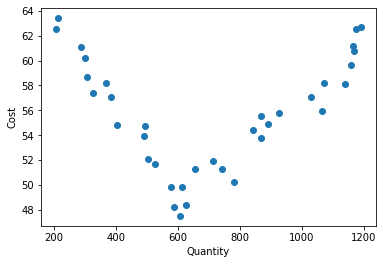

In [12]:
# Draw scatter plot to check the relationship between the two variables
plt.scatter(data['Quantity'],data['Cost'])
plt.xlabel("Quantity")
plt.ylabel("Cost")
plt.show()

In [13]:
import statsmodels.api as sm

# Seperate the independent variable
X = sm.add_constant( data['Quantity'] )
X.head(5)

# Dependent variable
Y = data['Cost']



In [14]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into Train and Test.

# 80:20 - Train:Test
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )

In [15]:
# Model Fit
inventory_lm = sm.OLS( train_y, train_X ).fit()

# Estimated Parameter Results
print( inventory_lm.params )


const       55.651110
Quantity     0.000612
dtype: float64


In [16]:
# Model Diagostics
print(inventory_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                   0.05072
Date:                Wed, 29 Sep 2021   Prob (F-statistic):              0.824
Time:                        13:00:40   Log-Likelihood:                -81.644
No. Observations:                  28   AIC:                             167.3
Df Residuals:                      26   BIC:                             170.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6511      1.990     27.962      0.0

<Figure size 576x432 with 0 Axes>

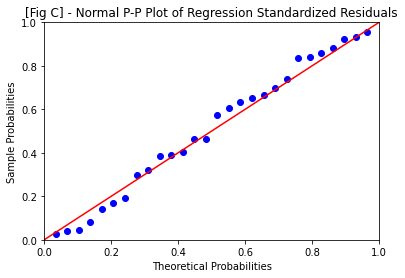

In [17]:
rue_resid = inventory_lm.resid
probplot = sm.ProbPlot( rue_resid, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "[Fig C] - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [18]:
# Check the z-score for outlier analysis
from scipy.stats import zscore
data['z_score_cost']=zscore(data.Cost)

data[ (data.z_score_cost > 3.0) | (data.z_score_cost < -3.0) ]

,Cost,Quantity,z_score_cost


In [20]:
# Same on test dataset
pred_y = inventory_lm.predict( test_X )
# Prediction on Validation set

from sklearn.metrics import r2_score, mean_squared_error


# print model evaluations for predictions
R2 = np.abs(r2_score(test_y, pred_y))
print("Prediction R2:", R2)


Prediction R2: 0.11713371287241503


In [21]:
import numpy
np.sqrt(mean_squared_error(test_y, pred_y))

4.554073712565091

In [22]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Predict the y values
pred_y = inventory_lm.predict( test_X )
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( inventory_lm,
test_X,
alpha = 0.1) #90 % confidence interval
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'Quantity': test_X['Quantity'],
'pred_y': pred_y,
'pred_y_left': pred_y_low,
'pred_y_right': pred_y_high } )

pred_y_df



,Quantity,pred_y,pred_y_left,pred_y_right
0,844,56.167561,48.073222,64.261900
19,1174,56.369491,47.973230,64.765752
32,741,56.104535,48.047112,64.161957
35,870,56.183471,48.075397,64.291545
7,577,56.004182,47.947321,64.061042
12,1160,56.360924,47.982919,64.738929
29,780,56.128399,48.060300,64.196499
33,712,56.086789,48.034685,64.138894


**Part D**

In [46]:
# Task 1

# Import regex library
import re

# Open both files
file1 = open("script01.txt","r") #open script01.txt and save into file1
file2 = open("script02.txt", "r") #open script02.txt and save into file2

script1 = file1.read() #read in file1 into script1
script2 = file2.read() #read in file2 into script2

script = script1 + script2 #combine script1 and script2

# Step 2: Create list and dictionary
atoz = "abcdefghijklmnopqrstuvwxyz" #create a list of the alphabet

outcome = {} #Create empty dictionary

# Step 3: Create your own function 
for character in script: 
    ch = character.lower() #make all characters lowercase
    if ch in atoz: #check to see if the character is in the alphabet
        if ch not in outcome: #check to see if character is not already saved in dictionary
            outcome[ch] = 1 #Save character in dictionary and set value to 1
        else: #Character already saved in dictionary
            outcome[ch] += 1 #Add 1 to the value

# Sort dictionary from highest to lowest value
outcome_sort = sorted(outcome.items(), reverse = True, key=lambda x: x[1])

# Display the sorted output 
outcome_sort

# Write the output to text file called parta
with open('parta.txt','w') as f:
    print(outcome_sort,file=f)



In [47]:
# Task 2

# Import regex library
import re

file1 = open("script01.txt","r") #open script01.txt and save into file1
file2 = open("script02.txt", "r") #open script02.txt and save into file2

script1 = file1.read() #read in file1 into script1
script2 = file2.read() #read in file2 into script2

# Combine script1 and script2
script = script1 + script2 

# Convert all text to lower
script = script.lower()

# Substitute all characters except alphabets and spaces by an empty space 
script = re.sub('[^a-z ]+', ' ', script)

# Split the string into an array containing individual words
words = script.split()

# Create empty dictionary
outcome2 = {} 

# For loop to count the occurence of each word
for word in words: 
  if word not in outcome2: # If word is not in outcome
    outcome2[word] = 1 # Add the word and set index to 1
  else:
    outcome2[word] += 1 # Otherwise increase the index by 1

# Sort the dict by the number of occurences of each word
outcome2_sort = sorted(outcome2.items(), reverse = True, key=lambda x: x[1])

# Display the top 10 most frequently occuring words
list(outcome2_sort)[:10]

# Write the output to text file called partb
with open('partb.txt','w') as f:
    print(outcome2_sort,file=f)


In [48]:
# Task 3

# Get relevant libraries 
import re
import pandas as pd

# Open script01.txt and save into file1
file1 = open("script01.txt","r") 

# Open script02.txt and save into file1
file2 = open("script02.txt","r")

# Read in file1 into script1
script1 = file1.read() 

# Read in file2 into script2
script2 = file2.read()

# Load the data and convert the stop words into a list
data = pd.read_csv('stopwords.csv')
stop_words = data['above'].tolist()

# Convert script1 to lowercase and substitute all characters except alphabets and spaces by an empty space 
script1 = script1.lower()
script1 = re.sub('[^a-z ]+', ' ', script1)

# Split script1 into a list of words
script1 = script1.split()

# Convert script2 to lowercase and substitute all characters except alphabets and spaces by an empty space 
script2 = script2.lower()
script2 = re.sub('[^a-z ]+', ' ', script2)

# Split script2 into a list of words
script2 = script2.split()

# Create empty list to hold all the filtered words from script1
final_words1 = []

# Check all words in script1
for word in script1:
    if word not in stop_words: # If word is not in stop words
        if len(word) >= 2: # If the word is not a singleton
            final_words1.append(word)  # Add the word to list holding the filtered words from script1

# Create empty list to hold all the filtered words from script2
final_words2 = []

# Check all words in script1
for word in script2:
    if word not in stop_words: # If word is not in stop words
        if len(word) >= 2: # If the word is not a singleton
            final_words2.append(word)  # Add the word to list holding the filtered words from script2               

outcome_script1 = {} # Create empty dictionary to hold word count

# For all filtered words from script1
for word in final_words1: 
    
  if word not in outcome_script1: # Check to see if word is not already saved in dictionary
    outcome_script1[word] = 1 # Save word in dictionary and set value to 1
  else:  # Word already saved in dictionary
    outcome_script1[word] += 1 # Increase the count occurrence of the word

# Sort dictionary from highest to lowest value
outcome_script1 = sorted(outcome_script1.items(), reverse = True, key=lambda x: x[1]) 

# Grab the top 10 values which represent the 10 most occurring words and their counts
top_10 = (outcome_script1)[:10] 

# Empty list to store the top 10 words
top_10_words = []

# Grab the 10 most occurring words from the list, which is the first part of a tuple
for word in top_10:
    top_10_words.append(word[0])

# Empty dict to store counts of occurring in script2
script2_count = {}

# Check all filtered words in script2
for word in final_words2:
    if word in top_10_words: # If the word exists in the list containing top 10 words from script1
        if word not in script2_count: # Check to see if word already saved in the dict
            script2_count[word] = 1 # Save word in dict and set value to 1
        else: # Word already saved in dict
            script2_count[word] += 1 # Increase the count occurrence of the word

# Check all filtered words in script2
for word in top_10_words:
    if word not in script2_count: # If word did not appear in top 10 list
        script2_count[word] = 0 # Set the count of that word to 0

# Sory both lists containing the words and their occurrence count alphabetically
count = sorted(script2_count.items(), reverse = False, key=lambda x: x[0])
top_10 = sorted(top_10, reverse = False, key=lambda x: x[0])

# Convert the lists to dataframes
df1 = pd.DataFrame(top_10, columns =['Word', 'Script1_count'])
df2 = pd.DataFrame(count, columns =['Word', 'Script2_count'])

# Merge the 2 dataframes to get the word and thier counts in both scripts
data = df1.merge(df2)

# Print the resulting dataframe
data

# Write the output to text file called partc
with open('partc.txt','w') as f:
    print(data,file=f)
    